In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [34]:
import warnings
warnings.filterwarnings("ignore")


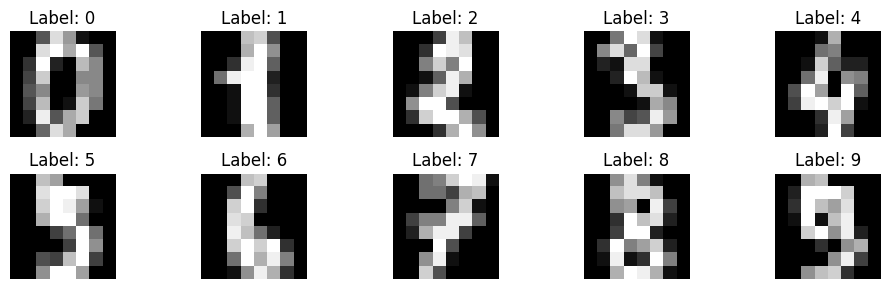

In [36]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

digits = load_digits()
X, y = digits.data, digits.target
y

plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [38]:
data_new=pd.DataFrame(X,columns=digits.feature_names)
data_new.shape

(1797, 64)

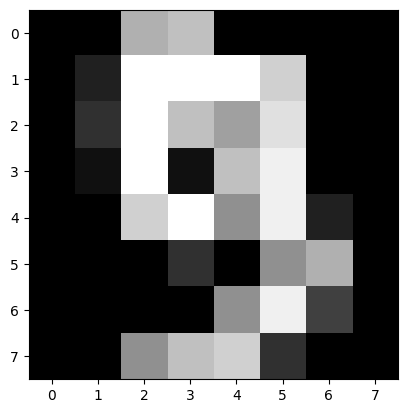

In [40]:
plt.imshow(data_new.loc[9].values.reshape(8,8),cmap='gray')

In [41]:
data_new.sample(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1557,0.0,0.0,2.0,10.0,12.0,2.0,0.0,0.0,0.0,0.0,...,16.0,3.0,0.0,0.0,3.0,13.0,9.0,8.0,4.0,0.0
1665,0.0,0.0,1.0,10.0,13.0,12.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0
65,0.0,0.0,0.0,9.0,10.0,0.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,0.0,0.0,6.0,12.0,14.0,9.0,0.0
1740,0.0,0.0,8.0,16.0,11.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,6.0,15.0,16.0,12.0,1.0,0.0
831,0.0,0.0,7.0,15.0,14.0,8.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0
117,0.0,2.0,15.0,16.0,16.0,14.0,2.0,0.0,0.0,3.0,...,0.0,0.0,0.0,3.0,16.0,13.0,1.0,0.0,0.0,0.0
630,0.0,0.0,0.0,7.0,12.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,15.0,14.0,2.0,0.0
1047,0.0,0.0,14.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,15.0,12.0,1.0,0.0,0.0
1634,0.0,0.0,0.0,16.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,16.0,2.0,0.0,0.0
797,0.0,0.0,1.0,11.0,15.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,15.0,15.0,3.0,0.0,0.0


In [43]:
data_new['target']=digits.target
data_new.shape

(1797, 65)

In [45]:
X_train, X_test, y_train, y_test = train_test_split( data_new.drop(columns=['target']), data_new['target'],  test_size=0.3, random_state=10)
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=10000, multi_class='multinomial')
log_model.fit(X_train, y_train)

# Accuracy
y_pred = log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9648148148148148

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       0.93      0.96      0.95        57
           2       0.95      1.00      0.97        55
           3       0.96      0.96      0.96        56
           4       0.98      0.94      0.96        51
           5       0.96      0.96      0.96        51
           6       0.98      0.98      0.98        55
           7       0.98      0.97      0.97        60
           8       0.92      0.92      0.92        50
           9       1.00      0.94      0.97        54

    accuracy                           0.96       540
   macro avg       0.97      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540



#### Confusion Matrix

Confusion Matrix:
[[51  0  0  0  0  0  0  0  0  0]
 [ 0 55  1  0  0  0  0  0  1  0]
 [ 0  0 55  0  0  0  0  0  0  0]
 [ 0  0  1 54  0  1  0  0  0  0]
 [ 0  2  0  0 48  0  0  0  1  0]
 [ 0  1  0  0  0 49  0  1  0  0]
 [ 0  1  0  0  0  0 54  0  0  0]
 [ 0  0  0  1  1  0  0 58  0  0]
 [ 1  0  1  1  0  0  1  0 46  0]
 [ 0  0  0  0  0  1  0  0  2 51]]


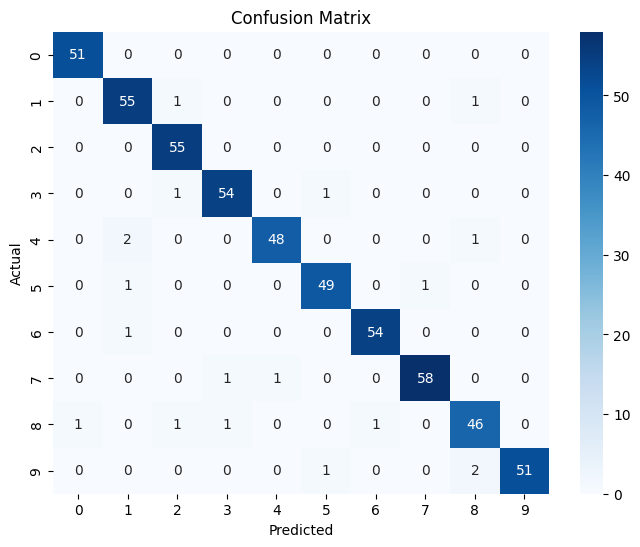

In [47]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=digits.target_names, 
            yticklabels=digits.target_names)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [50]:
X_test.index

Index([ 763,  278, 1535, 1777,  123, 1618,  270,  874,  961,  130,
       ...
       1580, 1380,  194,  612, 1183, 1014,  879, 1674,  114,  822],
      dtype='int64', length=540)

In [53]:
plt.figure(figsize=(10,3))

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

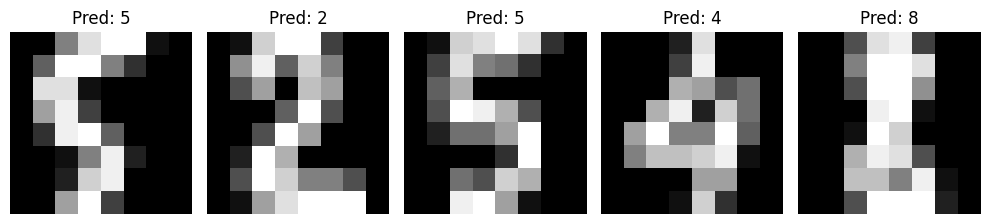

In [55]:
plt.figure(figsize=(10, 3))
for j, i in enumerate(X_test.index[:5]):
    plt.subplot(1, 5, j + 1)
    plt.imshow(X_test.loc[i].values.reshape(8, 8), cmap='gray')
    plt.title(f"Pred: {y_pred[j]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/kaggle/input/house-csv/final_dataframe.csv')
df

,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt,GarageCars,GarageArea,FullBath,TotRmsAbvGrd,Fireplaces,LotArea,YearRemodAdd
0,114400.0,1710.0,856.0,2003.0,2.0,548.0,2.0,8.0,0.0,8450.0,2003.0
1,114400.0,1262.0,1262.0,1976.0,2.0,460.0,2.0,6.0,1.0,9600.0,1976.0
2,114400.0,1786.0,920.0,2001.0,2.0,608.0,2.0,6.0,1.0,11250.0,2002.0
3,114400.0,1717.0,756.0,1915.0,3.0,642.0,1.0,7.0,1.0,9550.0,1970.0
4,114400.0,2198.0,1145.0,2000.0,3.0,836.0,2.0,9.0,1.0,14260.0,2000.0
5,114400.0,1362.0,796.0,1993.0,2.0,480.0,2.0,5.0,1.0,14115.0,1994.0
6,114400.0,1694.0,840.0,2004.0,2.0,636.0,2.0,7.0,1.0,10084.0,2005.0
7,114400.0,2090.0,910.0,1973.0,2.0,484.0,2.0,7.0,2.0,10382.0,1973.0
8,114400.0,1774.0,996.0,1931.0,1.0,468.0,1.0,8.0,2.0,6120.0,1950.0
9,114400.0,1077.0,952.0,1939.0,1.0,205.0,1.0,5.0,2.0,7420.0,1950.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   10 non-null     float64
 1   GrLivArea     10 non-null     float64
 2   TotalBsmtSF   10 non-null     float64
 3   YearBuilt     10 non-null     float64
 4   GarageCars    10 non-null     float64
 5   GarageArea    10 non-null     float64
 6   FullBath      10 non-null     float64
 7   TotRmsAbvGrd  10 non-null     float64
 8   Fireplaces    10 non-null     float64
 9   LotArea       10 non-null     float64
 10  YearRemodAdd  10 non-null     float64
dtypes: float64(11)
memory usage: 1012.0 bytes


In [67]:
df.shape

(10, 11)

In [68]:
df.head()

,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt,GarageCars,GarageArea,FullBath,TotRmsAbvGrd,Fireplaces,LotArea,YearRemodAdd
0,114400.0,1710.0,856.0,2003.0,2.0,548.0,2.0,8.0,0.0,8450.0,2003.0
1,114400.0,1262.0,1262.0,1976.0,2.0,460.0,2.0,6.0,1.0,9600.0,1976.0
2,114400.0,1786.0,920.0,2001.0,2.0,608.0,2.0,6.0,1.0,11250.0,2002.0
3,114400.0,1717.0,756.0,1915.0,3.0,642.0,1.0,7.0,1.0,9550.0,1970.0
4,114400.0,2198.0,1145.0,2000.0,3.0,836.0,2.0,9.0,1.0,14260.0,2000.0


In [69]:
df.isnull().sum()

OverallQual     0
GrLivArea       0
TotalBsmtSF     0
YearBuilt       0
GarageCars      0
GarageArea      0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
LotArea         0
YearRemodAdd    0
dtype: int64

In [77]:
mt = df.corr(numeric_only=True)


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

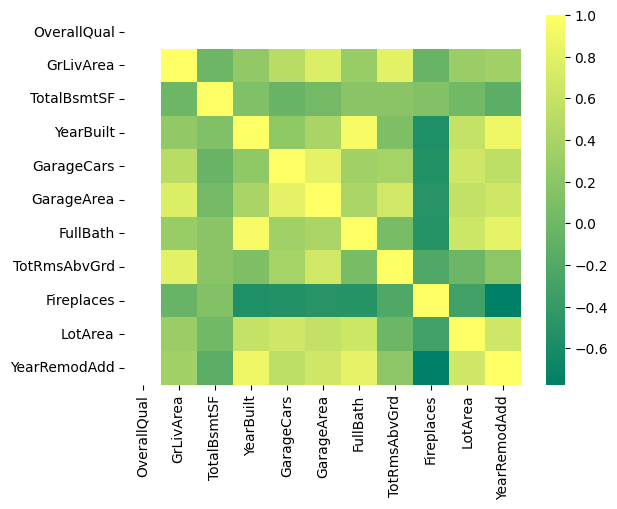

In [80]:
sns.heatmap(mt,fmt='.2f',cmap='summer')

<Axes: >

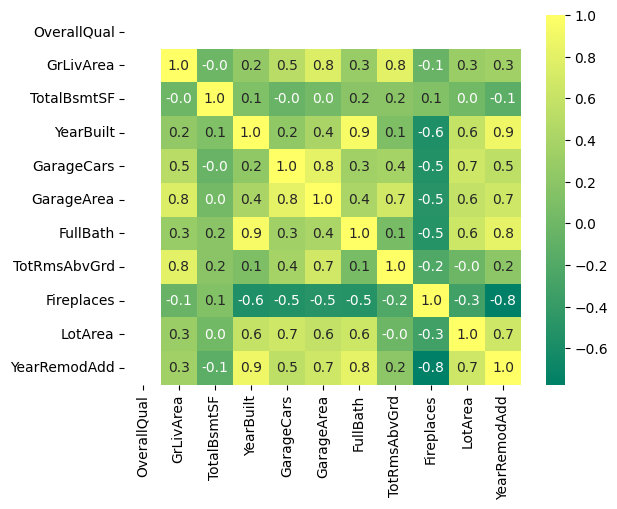

In [81]:
sns.heatmap(mt,annot=True ,fmt='.1f',cmap='summer')